# **Estimated Ultimate Recovery Prediction in Shale Reservoirs**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Shale Gas Wells.csv to Shale Gas Wells.csv


In [2]:
import pandas as pd
dataset=pd.read_csv('Shale Gas Wells.csv')

In [3]:
print(dataset.describe())

       Stage Spacing      bbl/ft  ...  Proppant Loading         EUR
count     506.000000  506.000000  ...        506.000000  506.000000
mean      147.640316   35.134387  ...       2567.065217   12.845455
std        18.392128   10.533197  ...        413.792220    3.067064
min       140.000000   30.000000  ...       1100.000000    7.000000
25%       140.000000   30.000000  ...       2317.500000   11.000000
50%       141.000000   30.000000  ...       2642.000000   12.400000
75%       148.000000   36.000000  ...       2897.750000   13.700000
max       330.000000   75.000000  ...       3200.000000   22.000000

[8 rows x 14 columns]


In [4]:
X=dataset.iloc[:,0:13]
y=dataset.iloc[:,13].values
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
Xnorm=pd.DataFrame(data=sc.fit_transform(X))
yshape=pd.DataFrame(data=y.reshape(-1,1))
ynorm=pd.DataFrame(data=sc.fit_transform(yshape))
print(Xnorm)

      0         1         2    3   ...    9        10   11        12
0    0.0  0.177778  0.285714  0.0  ...  0.21  0.28750  1.0  0.910476
1    0.0  0.000000  0.357143  0.0  ...  0.10  0.55375  1.0  0.795714
2    0.0  0.000000  0.357143  0.0  ...  0.10  0.55375  1.0  0.936667
3    0.0  0.000000  0.428571  0.0  ...  0.07  0.64875  1.0  0.966667
4    0.0  0.000000  0.428571  0.0  ...  0.07  0.64875  1.0  0.900476
..   ...       ...       ...  ...  ...   ...      ...  ...       ...
501  0.0  0.000000  0.142857  0.0  ...  0.16  0.89375  1.0  0.780952
502  0.0  0.000000  0.071429  0.0  ...  0.16  0.89375  1.0  0.797143
503  0.0  0.000000  0.071429  0.0  ...  0.16  0.89375  1.0  0.891905
504  0.0  0.000000  0.142857  0.0  ...  0.16  0.89375  1.0  0.869048
505  0.0  0.000000  0.142857  0.0  ...  0.16  0.89375  1.0  0.830476

[506 rows x 13 columns]


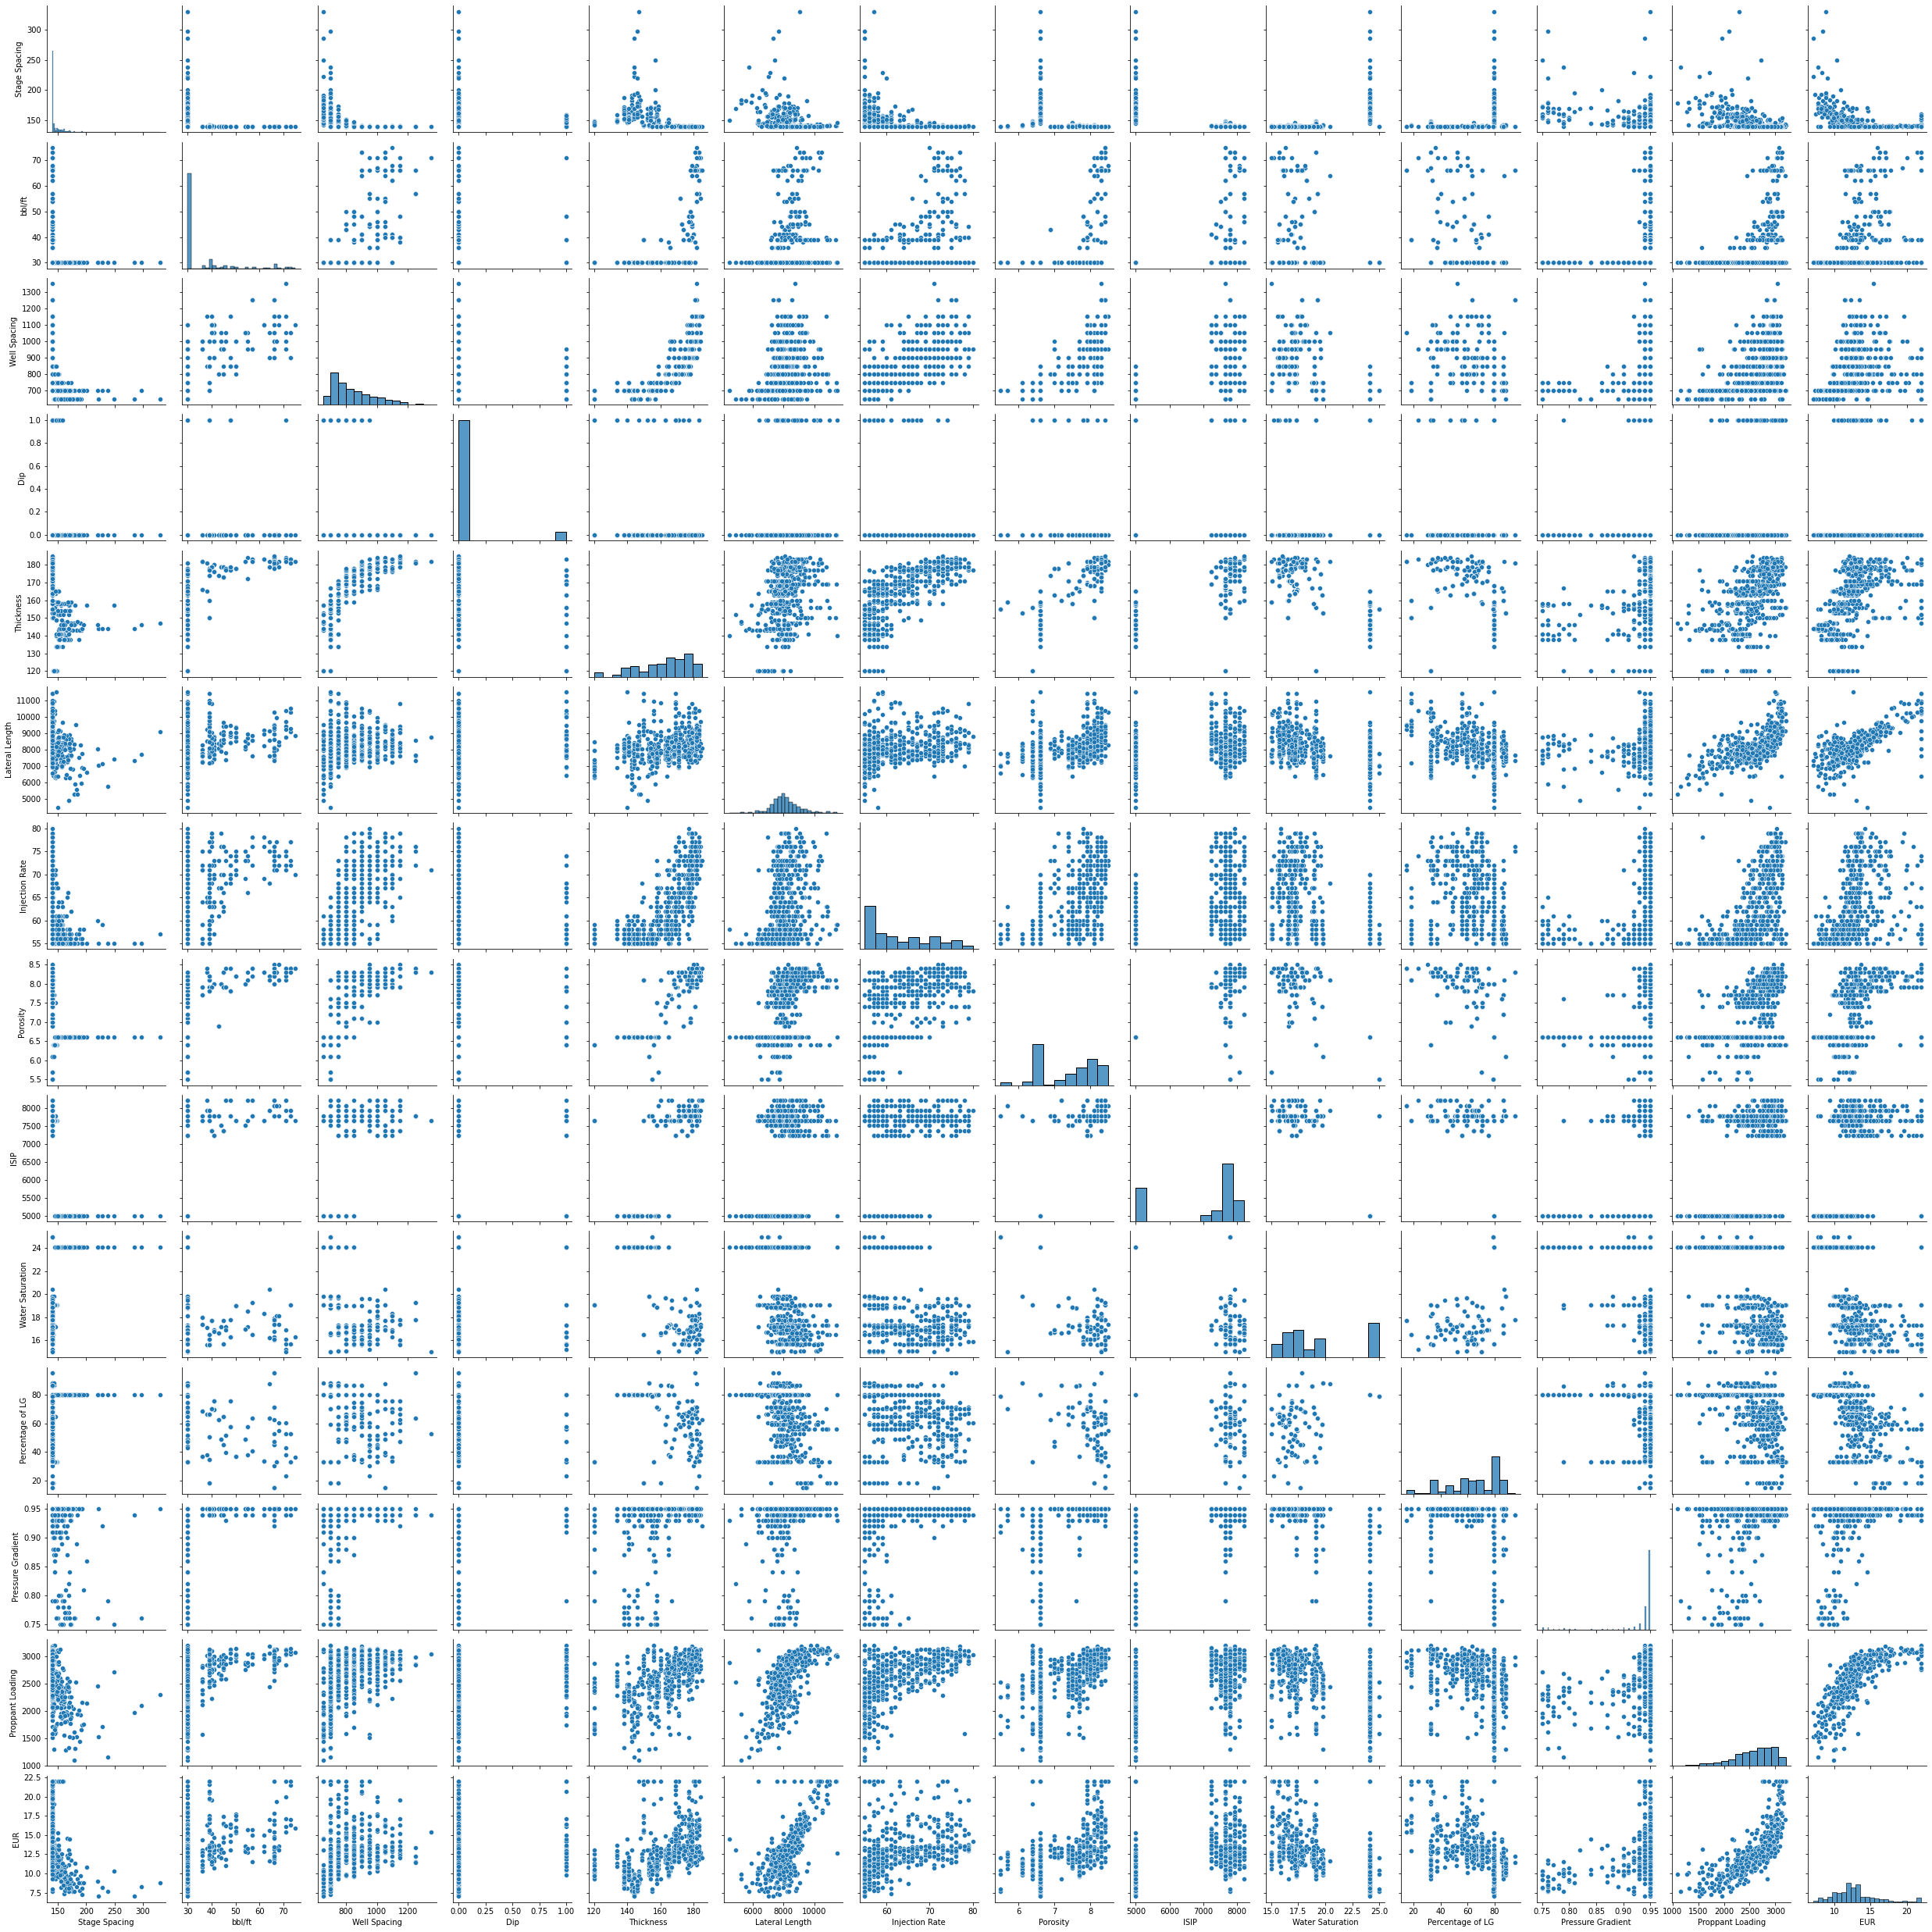

In [5]:
import seaborn as sns
sns.pairplot(dataset)

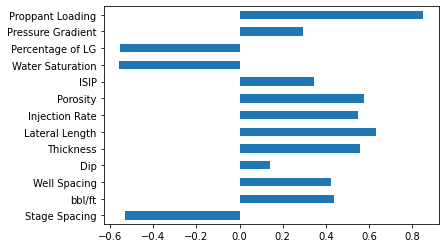

In [6]:
from scipy import stats
import matplotlib.pyplot as plt
datanorm=sc.fit_transform(dataset)
stats.spearmanr(dataset) 
rho, pval=stats.spearmanr(datanorm)
corr=pd.Series(rho[:13,13], index=X.columns)
corr.plot(kind='barh') 
plt.show()

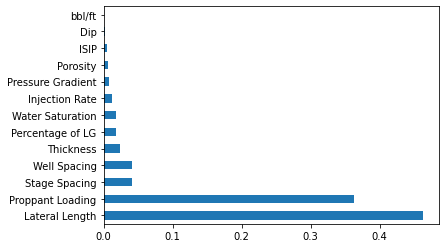

In [7]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(max_depth=10, random_state=0)
model.fit(X,y)
feat_importances=pd.Series(model.feature_importances_,
index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [8]:
import numpy as np
seed=50
np.random.seed(seed)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(Xnorm, ynorm,
test_size=0.3)
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
model=Sequential()
model.add(Dense(13, activation='relu',input_dim=13))
model.add(Dense(13, activation='relu'))
model.add(Dense(1))
np.random.seed(seed)
model.compile(optimizer='adam', loss='mean_squared_error')
early_stopping_monitor=EarlyStopping(patience=3)
history=model.fit(X_train,y_train,epochs=100,
validation_data=(X_test, y_test),
callbacks=[early_stopping_monitor])

Epoch 1/100
12/12 [==============================] - 1s 23ms/step - loss: 0.0689 - val_loss: 0.0588
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0529 - val_loss: 0.0541
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0472 - val_loss: 0.0504
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0415 - val_loss: 0.0458
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0372 - val_loss: 0.0419
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0332 - val_loss: 0.0391
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0295 - val_loss: 0.0361
Epoch 8/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0269 - val_loss: 0.0337
Epoch 9/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0249 - val_loss: 0.0314
Epoch 10/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0225 - val_loss: 0.0294
Epoch 11

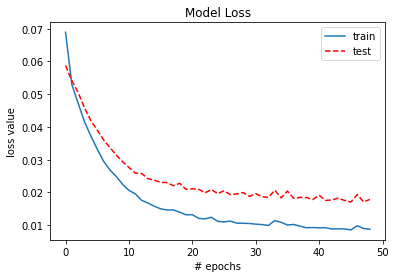

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"],"r--")
plt.title('Model Loss')
plt.ylabel('loss value')
plt.xlabel('# epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

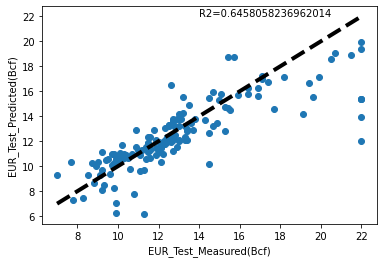

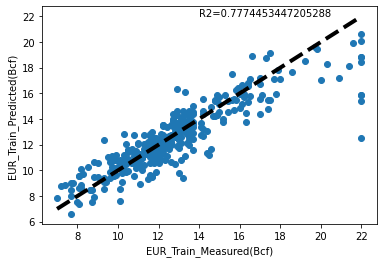

In [10]:
from sklearn.metrics import r2_score
EUR_test=y_test*(y.max()-y.min())+y.min()
EUR_train=y_train*(y.max()-y.min())+y.min()
EUR_test_prediction=model.predict(X_test)*(y.max()-y.min())+\
y.min()
EUR_train_prediction=model.predict(X_train)*(y.max()-y.min())+\
y.min()
r2_test=r2_score(EUR_test, EUR_test_prediction)
r2_train=r2_score(EUR_train, EUR_train_prediction)
fig, ax=plt.subplots()
ax.scatter(EUR_test, EUR_test_prediction)
ax.plot([EUR_test.min(), EUR_test.max()], [EUR_test.min(),
EUR_test.max()], 'k--', lw=4)
ax.set_xlabel('EUR_Test_Measured(Bcf)')
ax.set_ylabel('EUR_Test_Predicted(Bcf)')
plt.text(14,22,"R2="+str(r2_test).format("%.2f"))
fig, ax=plt.subplots()
ax.scatter(EUR_train, EUR_train_prediction)
ax.plot([EUR_train.min(), EUR_train.max()], [EUR_train.min(),
EUR_train.max()], 'k--', lw=4)
ax.set_xlabel('EUR_Train_Measured(Bcf)')
ax.set_ylabel('EUR_Train_Predicted(Bcf)')
plt.text(14,22,"R2="+str(r2_train).format("%.2f"))
plt.show()